# 直方图 查找,绘制,分析

定义: 在X轴上具有像素值（不总是从0到255的范围），在Y轴上具有图像中相应像素数的图。
## 相关术语
1. BINS 直方图的单位刻度大小(默认为1)
2. DIMS 收集数据的参数的数量(默认为1)
3. RANGE 收集数据的参数的数量(默认为[0,255])

## 计算直方图以及绘制灰度直方图

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# 读取图像
image = cv.imread('../data/apple.jpg')
 
# 创建直方图 速度  cv.calcHist=40  np.bincount()=10 np.histogram()=1
hist = cv.calcHist([image], [0], None, [256], [0, 256])

hist,bins = np.histogram(image.ravel(),256,[0,256])

hist = np.bincount(image.ravel(),minlength = 256)

# 默认绘制灰度直方图
plt.hist(image.ravel(),256,[0,256])
plt.show()


## rgb直方图

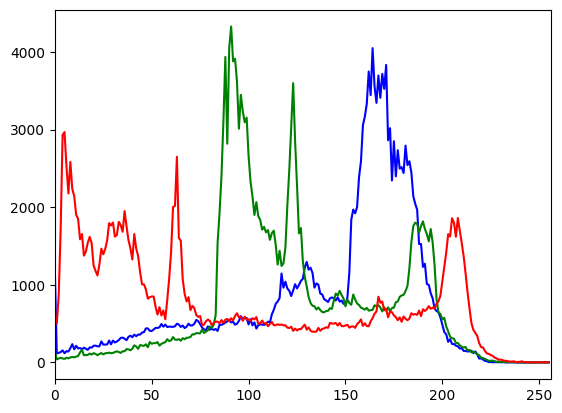

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../data/home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## 应用掩码对roi去直方图

C:\Users\28678\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\28678\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\28678\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\28678\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

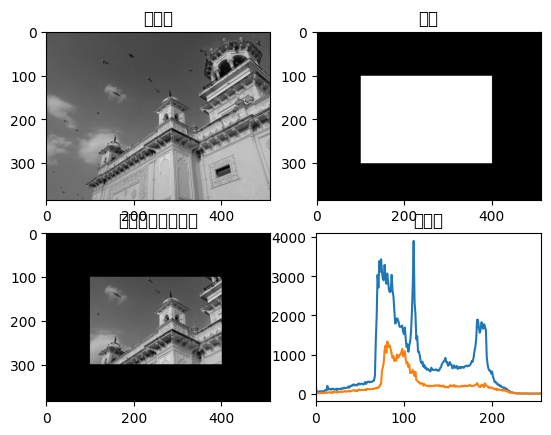

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 读取图像（以灰度模式）
img = cv.imread('../data/home.jpg', 0)

# 创建掩码
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255

# 对图像应用掩码
masked_img = cv.bitwise_and(img, img, mask=mask)

# 计算完整图像和掩码区域的直方图
hist_full = cv.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv.calcHist([img], [0], mask, [256], [0, 256])

# 绘制图像和直方图
plt.subplot(221), plt.imshow(img, 'gray')
plt.title('原图像')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.title('掩码')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.title('应用掩码后的图像')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.title('直方图')
plt.show()


# 直方图均衡
1. 好的图像应该是来自图像所有区域的像素
2. 直方图均衡会提高对比度

## CDF: 累计分布函数
CDF，即累积分布函数（Cumulative Distribution Function），是概率论和统计学中常用的函数之一。对于一个随机变量，CDF描述了它的取值小于或等于某个给定值的概率。

在图像处理中，CDF常用于描述图像灰度级的分布情况。对于图像的灰度直方图，CDF表示了在每个灰度级下，该灰度级及之前的所有灰度级出现的像素数占总像素数的比例。

在下面代码中，计算CDF的步骤如下：

1. 通过计算图像的灰度直方图，得到每个灰度级下的像素数（hist）。
2. 使用cumsum方法计算累积和（CDF），得到每个灰度级及之前的所有灰度级出现的像素数之和（cdf）。
3. 对CDF进行归一化，使其取值范围在0到1之间，以便在绘制时与直方图作对比。  

通过绘制CDF曲线，我们可以了解图像的灰度级分布情况，以及灰度级上的像素累积概率。CDF曲线的斜率越陡峭，表示图像中存在大量像素集中在该灰度级附近；而斜率较缓的区域表示灰度级分布较为均匀。直方图与CDF曲线的组合可以提供有关图像灰度分布的更详细信息。

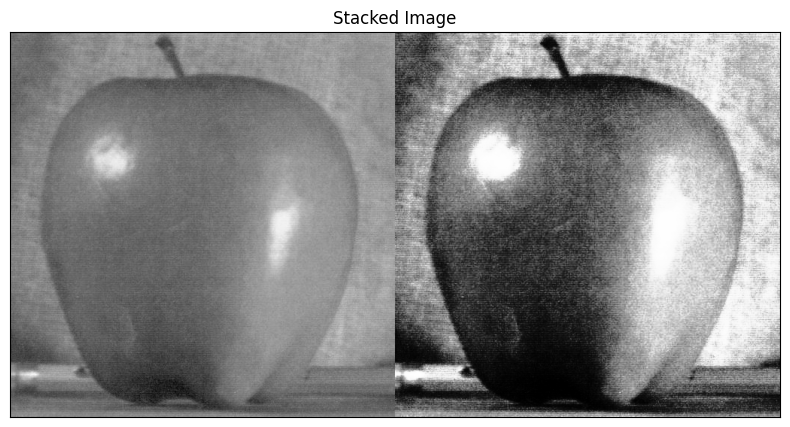

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import _tools

# 读取灰度图像
img = cv.imread("../data/apple.jpg", 0)

# 计算灰度直方图
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# 计算累积分布函数（CDF）
cdf = hist.cumsum()

# 归一化CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# 创建了一个掩码数组 cdf_m，用于将 CDF 中的零值屏蔽（遮蔽）起来 
cdf_m = np.ma.masked_equal(cdf,0)
# 归一化和线性拉伸的操作
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# 这行代码将对掩码数组 cdf_m 进行操作，将之前其中的屏蔽（masked）值填充为 0，并将数据类型转换为无符号整数类型（uint8）。
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# img 数组中的每个像素值将被用作索引，从 cdf 数组中查找对应的像素值进行替换
img2 = cdf[img] 
 # 显示结果

# 创建图形对象和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 将图像堆叠在一起显示
res = np.hstack((img, img2))

# 绘制堆叠后的图像
_tools.plot_image( 111,res, "Stacked Image","gray")

# 显示所有图像
plt.show()

# # 在子图上绘制直方图和CDF曲线
# ax1.plot(cdf_normalized, color='b')
# ax1.set_xlim([0, 256])
# ax1.set_title('CDF')
# ax1.hist(img.flatten(), 256, [0, 256], color='r')
# ax1.set_xlim([0, 256])
# ax1.set_title('Histogram')

# ax2.hist(img2.flatten(), 256, [0, 256], color='r')
# ax2.set_xlim([0, 256])
# ax2.set_title('Histogram')

# ax2.plot(cdf, color='b')
# ax2.set_xlim([0, 256])
# ax2.set_title('CDF')

# ax1.legend(('histogram', 'histogram'), loc='upper left')

# # 调整子图之间的间距
# plt.tight_layout()

# # 显示图形
# plt.show()


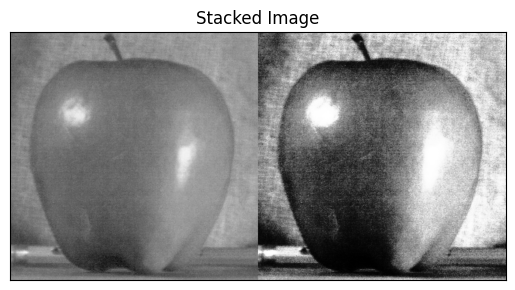

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import _tools

# 读取图像
img = cv.imread('../data/apple.jpg', 0)

# 进行直方图均衡化
equ = cv.equalizeHist(img)

# 将图像堆叠在一起显示
res = np.hstack((img, equ))

# 绘制堆叠后的图像
_tools.plot_image( 111,res, "Stacked Image","gray")

# 显示所有图像
plt.show()


## 自适应直方图均衡
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  
1. clipLimit（默认值为 40.0）：这是 CLAHE 中的对比度限制参数，用于控制直方图均衡化的对比度增强程度。
2. tileGridSize（默认值为 (8, 8)）：这是 CLAHE 中用于划分图像的局部区域的网格大小。图像被划分为多个小块，每个小块独立进行直方图均衡化。

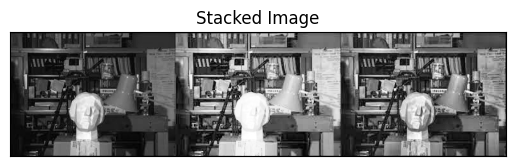

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import _tools
img = cv.imread('../data/tsukuba_l.png',0)

# 自适应
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

# 全局进行直方图均衡化
equ = cv.equalizeHist(img)

# 将图像堆叠在一起显示
res = np.hstack((img, equ,cl1))

# 绘制堆叠后的图像
_tools.plot_image( 111,res, "Stacked Image","gray")

# 显示所有图像
plt.show()


# 二维直方图
二维直方图中，我们会考虑两个特征。 通常，它用于查找颜色直方图，其中两个特征是每个像素的色相和饱和度值

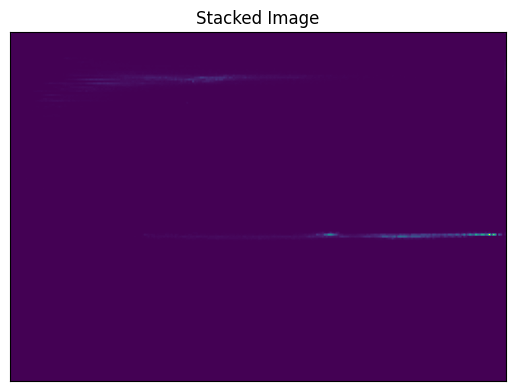

In [4]:
import numpy as np
import cv2 as cv
import _tools
img = cv.imread('../data/home.jpg')
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
# 绘制堆叠后的图像
_tools.plot_image( 111,hist, "Stacked Image")
# 显示所有图像
plt.show()

## 直方图反投影

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#roi是我们需要找到的对象或对象区域
roi = cv.imread('../data/rose_red.png')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
#目标是我们搜索的图像
target = cv.imread('rose.png')
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
# 使用calcHist查找直方图。也可以使用np.histogram2d完成
M = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
